# ChrAcc Peak and Regulatory Region Calling 

## Introduction

The scheme for calling chromatin accessible peaks and then calling active and silent regulatory regions is depicted in figure 3A of the manuscript. In brief, chrAcc peaks are called using de-duplicated re-isolated plasmid DNA files (denoted here as "DNA). These peaks, after filtering, are converted into 50bp sliding windows, with a 10bp step size. Duplicated Reporter RNA files ("RNA") and duplicated DNA files are then counted for each bin. We then perform differential analysis to identify statistically significant bins where RNA and DNA counts are different. L2FC > 0 is active, whereas L2FC is silent. These bins are often overlapping, so we then merge the active and silent bin files separately and averaged the L2FC score of the overlapping bins. 

To automate this process, we developed a python script that takes in chrAcc peaks and the ATAC-STARR duplicated bam files to call active and silent regions. 

## Call Accessibility Peaks

Using the genrich computational tool, we will call chromatin accessibility peaks (ChrAcc peaks) for the ATAC-STARR data. These peaks will be analyzed against the buenrostro dataset and will serve as input into the second part of this notebook where we call active and silent regulatory regions. 

Called peaks are filtered using a padj < 0.0001. 

The below was also done for buenrostro data, but is not shown here.

In [1]:
%%bash
#Variables:
INPUT_DIR=''
OUTPUT_DIR=''

Genrich -t ${INPUT_DIR}/GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam,${INPUT_DIR}/GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam,${INPUT_DIR}/GM12878inGM12878_DNA_Rep3.unique.n-sorted.bam \
    -o ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak -j -v

Processing experimental file #0: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam
  BAM records analyzed:   45252363
    Paired alignments:    45252363
      "orphan" alns:           173
    Unpaired alignments:         0
  Fragments analyzed:     22626095
    Full fragments:       22626095
    ATAC-seq cut sites:   45252190
      (expanded to length 100bp)
- control file #0 not provided -
  Background pileup value: 1.325799
Processing experimental file #1: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam
  BAM records analyzed:   40031374
    Paired alignments:    40031374
      "orphan" alns:           118
    Unpaired alignments:         0
  Fragments analyzed:     20015628
    Full fragments:       20015628
    ATAC-seq cut sites:   40031256
      (expanded to length 100bp)
- control file #1 not provided -
  Background pileup value:

In [2]:
%%bash
#write a filtered peakset. 
OUTPUT_DIR=''

#q=<0.0001
awk '$9 >4' ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates.narrowPeak > \
    ${OUTPUT_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak

## Call Regulatory Regions

Using a python script (and associated R script) I wrote, I will now call regulatory regions using the 3-replicates_0.0001-qvalue peakset and all three replicate bam files. 

In [1]:
%%bash
#view python script behavior:
python3 call_ATAC-STARR_regulatory-regions.py --help

usage: call_ATAC-STARR_regulatory-regions.py [-h] [-i CHRACC_PEAKS]
                                             [-d DNA_BAMS [DNA_BAMS ...]]
                                             [-r RNA_BAMS [RNA_BAMS ...]]
                                             [-o OUT_DIR] [-q FDR]

Call ATAC-STARR Regulatory Regions

required arguments:
  -i CHRACC_PEAKS, --ChrAcc_peaks CHRACC_PEAKS
                        accessibility peaks (narrow-peak format)
  -d DNA_BAMS [DNA_BAMS ...], --DNA_bams DNA_BAMS [DNA_BAMS ...]
                        reisolated plasmid DNA bam files
  -r RNA_BAMS [RNA_BAMS ...], --RNA_bams RNA_BAMS [RNA_BAMS ...]
                        reporter RNA bam files
  -o OUT_DIR, --out_dir OUT_DIR
                        output directory

optional arguments:
  -h, --help            show this help message and exit
  -q FDR, --fdr FDR     false discovery rate for differential analysis
                        (default: 0.05)


In [5]:
%%bash
PEAKS='GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'
BAMS=''
OUT_DIR=''

#Call active and silent regions with the python script. 
python3 call_ATAC-STARR_regulatory-regions.py -i $PEAKS -o $OUT_DIR -q 0.1 \
    -d ${BAMS}/GM12878inGM12878_DNA_Rep1.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep2.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_DNA_Rep3.filtered.n-sorted.bam \
    -r ${BAMS}/GM12878inGM12878_RNA_Rep1.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep2.filtered.n-sorted.bam ${BAMS}/GM12878inGM12878_RNA_Rep3.filtered.n-sorted.bam

PARAMETERS:
ChrAcc Peaks File: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
DNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep3.filtered.n-sorted.bam
RNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep1.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep2.filtered.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep3.filtered.n-sorted.bam
Output Directory: /data/hodges_lab/ATAC-STARR_B-cells

mkdir: cannot create directory ‘/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink’: File exists

        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o GM12878inGM12878_DNA_Rep1.filtered.n-sorte ... ||
||                           o GM12878inGM12878_DNA_Rep2.filte

## Plotting

In addition to saving the active and silent regions, we also saved the res and dds R objects. Load them back into R and generate correlation and volcano plots to better understand the results. 

### Volcano Plot 

In [ ]:
#setup
library(tidyverse)
library(DESeq2)

In [5]:
load("res.Rdata")

Warning message:
“Removed 1277132 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 1277132 rows containing non-finite values (stat_bin2d).”


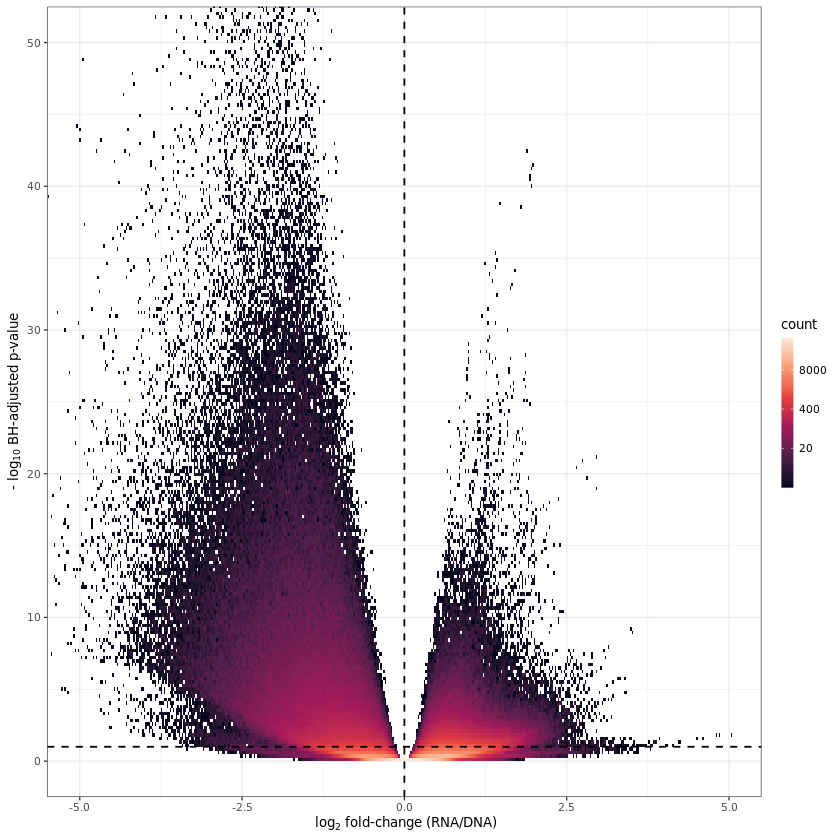

In [9]:
res_df <- as.data.frame(res) %>% rownames_to_column(var = "Bin_ID")

volcano <- ggplot(res_df) +
  geom_bin2d(aes(x=log2FoldChange, y=-log10(padj)), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000), option = "rocket") +
  geom_hline(yintercept = c(-log10(0.1)), linetype = "dashed") +
  geom_vline(xintercept = c(0), linetype = "dashed") +
  xlab(bquote(~log[2]~"fold-change (RNA/DNA)")) +
  ylab(bquote("-"~log[10]~"BH-adjusted p-value")) +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold")) +
  coord_cartesian(xlim = c(-5,5), ylim = c(0,50))

volcano

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(volcano, filename = paste0(res_dir, "/volcano.pdf"), device = cairo_pdf, width = 3, height = 2)

### Correlation Plots

In [6]:
#now load dds object
load("dds.Rdata")

In [7]:
#extract normalized counts
cts_df <- counts(dds, normalized=TRUE) %>% as.data.frame() %>% rownames_to_column(var = "Bin_ID")

#join all bins to the counts. 
bins_df <- inner_join(res_df, cts_df, by = "Bin_ID")

head(bins_df)

,Bin_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DNA1,DNA2,DNA3,RNA1,RNA2,RNA3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,bin_1,8.334317,-0.08400819,0.9591246,-0.0875884,0.9302038,NA,10.85649,6.623169,8.402344,0.7639394,22.57296,0.7870009
2,bin_2,10.118357,-0.20084498,0.8377193,-0.2397521,0.8105224,NA,12.21356,9.934753,10.502930,0.7639394,22.57296,4.7220057
3,bin_3,15.780312,-0.12947496,0.6379917,-0.2029415,0.8391808,NA,16.28474,16.557922,16.804688,14.5148493,25.79766,4.7220057
4,bin_4,21.168725,-0.33217391,0.5825897,-0.5701679,0.5685638,0.8244999,23.07005,21.525298,26.257325,22.9181831,27.73249,5.5090066
5,bin_5,25.839542,-0.30034328,0.5347798,-0.5616205,0.5743746,0.8276766,24.42711,26.492675,34.659670,25.9739409,34.82685,8.6570104
6,bin_6,28.434927,-0.24945276,0.4665874,-0.5346325,0.5929040,0.8376757,27.14124,26.492675,38.860842,25.9739409,34.82685,17.3140208


Warning message in cor.test.default(bins_df$RNA1, bins_df$RNA2, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  bins_df$RNA1 and bins_df$RNA2
S = 7.3245e+18, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7944581 



	Pearson's product-moment correlation

data:  bins_df$RNA1 and bins_df$RNA2
t = 9312.7, df = 5979656, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9671598 0.9672632
sample estimates:
      cor 
0.9672116 


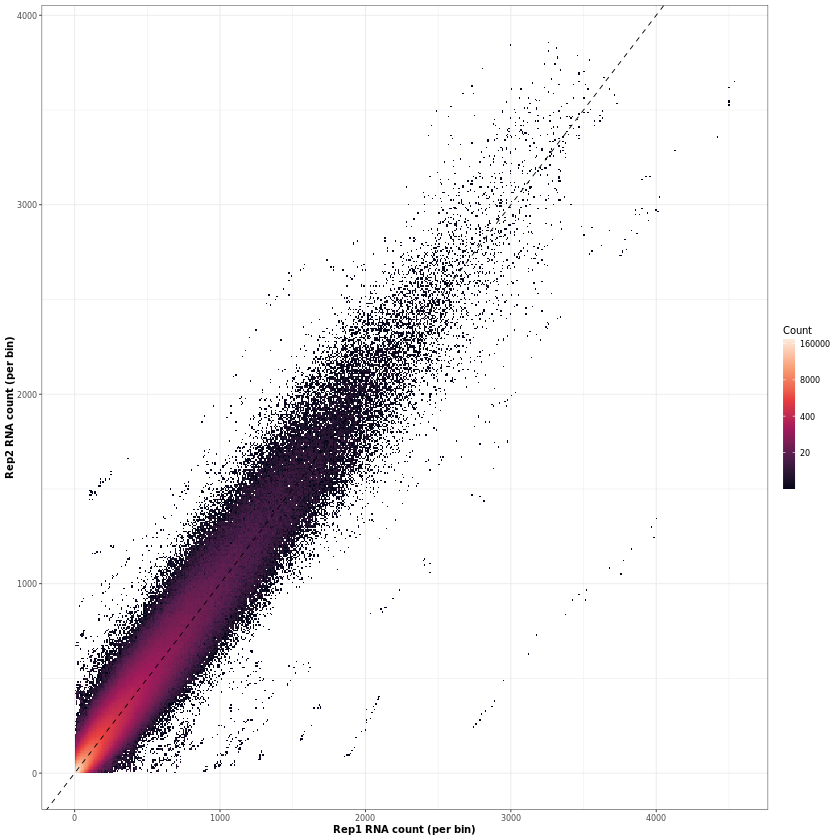

In [22]:
#Example of one pairwise comparison

cor.test(bins_df$RNA1, bins_df$RNA2, method = "spearman")
cor.test(bins_df$RNA1, bins_df$RNA2, method = "pearson")

p <- ggplot(bins_df) +
  geom_bin2d(aes(x=RNA1, y=RNA2), bins = 500) +
  scale_fill_viridis_c(trans = "log", breaks = c(0, 20, 400, 8000, 160000), option = "rocket") +
  geom_abline(mapping=aes(slope=1, intercept=0), colour="black", linetype="dashed", size=0.25) + 
  theme_bw(base_family = "Arial", base_size = 6) + 
  xlab("Rep1 RNA count (per bin)") + 
  ylab("Rep2 RNA count (per bin)") +
  labs(fill = "Count") +
  theme(legend.position = "right", legend.key.height = unit(0.25, units = "in"), 
        legend.key.width = unit(0.1, units = "in"), axis.title = element_text(face = "bold"))
p 

res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/corr_R1-R2.pdf"), device = cairo_pdf, width = 2, height = 2)

### Donut Charts

#### Bin Count

In [ ]:
%%bash
# get numbers for donut chart below, bins.saf has a header so subtract 1 from the wc -l result. 
wc -l bins.saf
wc -l active_bins.bed
wc -l silent_bins.bed

In [13]:
library(tidyverse)

plotDonut <- function(data){
    # Compute percentages
    data$fraction <- data$count / sum(data$count)
    # Compute the cumulative percentages (top of each rectangle)
    data$ymax <- cumsum(data$fraction)
    # Compute the bottom of each rectangle
    data$ymin <- c(0, head(data$ymax, n=-1))
    # Compute label position
    data$labelPosition <- (data$ymax + data$ymin) / 2
    # Compute a good label
    data$label <- paste0(data$category, "\n value: ", data$count)
    # Make the plot
    p <- ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
      geom_rect(color = "black") +
      scale_fill_manual(values = c("steelblue", "firebrick", "lightgray")) +
      coord_polar(theta="y") +
      xlim(c(2, 4)) +
      theme_void(base_size = 8) +
      theme(legend.title = element_blank())
    return(p)
}

#make df with groups and values to plot. 
df <- data.frame(
  category = c("Active Bins\n(251,895)","Silent Bins\n(339,737)","Not Significant\n(5,618,175)"),
  count = c(251895,339737,6209807-251895-339737)
)

#make group factored and order for plotting. 
df$category <- factor(df$category, levels = c("Active Bins\n(251,895)","Silent Bins\n(339,737)","Not Significant\n(5,618,175)"))

#Execute function.
p <- plotDonut(data = df)

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/bins_donut.pdf"), device = cairo_pdf, width = 3, height = 3)

#### ChrAcc Peak Count

In [ ]:
%%bash 
#get counts
ChrAcc='GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'

#print number of chracc peaks
wc -l $ChrAcc

#intersect peaks with active regions and print line number
bedtools intersect -u -a $ChrAcc -b active_regions.bed | wc -l

#intersect peaks with silent regions and print line number
bedtools intersect -u -a $ChrAcc -b silent_regions.bed | wc -l

#intersect peaks with overlapping active and silent regions and print line number
bedtools intersect -u -a $ChrAcc -b active_regions.bed | \
    bedtools intersect -u -a - -b silent_regions.bed | wc -l

#report peaks that do not intersect active or silent regions and print line number
bedtools intersect -v -a $ChrAcc -b ${regions_dir}/active_regions.bed | \
    bedtools intersect -v -a - -b ${regions_dir}/silent_regions.bed | wc -l
    

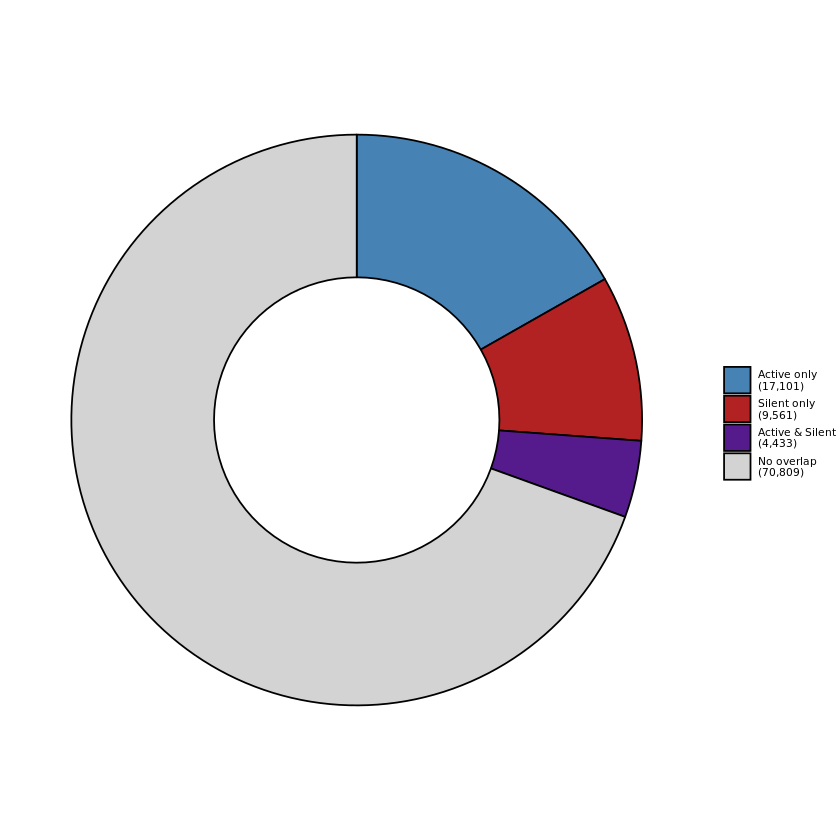

In [6]:
library(tidyverse)

plotDonut <- function(data){
    # Compute percentages
    data$fraction <- data$count / sum(data$count)
    # Compute the cumulative percentages (top of each rectangle)
    data$ymax <- cumsum(data$fraction)
    # Compute the bottom of each rectangle
    data$ymin <- c(0, head(data$ymax, n=-1))
    # Compute label position
    data$labelPosition <- (data$ymax + data$ymin) / 2
    # Compute a good label
    data$label <- paste0(data$category, "\n value: ", data$count)
    # Make the plot
    p <- ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
      geom_rect(color = "black") +
      scale_fill_manual(values = c("steelblue", "firebrick", "purple4","lightgray")) +
      coord_polar(theta="y") +
      xlim(c(2, 4)) +
      theme_void(base_size = 8) +
      theme(legend.title = element_blank())
    return(p)
}
#make df with groups and values to plot. 
df <- data.frame(
  category = c("Active only\n(17,101)","Silent only\n(9,561)","Active & Silent\n(4,433)","No overlap\n(70,809)"),
  count = c(21534-4433,13994-4433,4433,70809)
)

#make group factored and order for plotting. 
df$category <- factor(df$category, levels = c("Active only\n(17,101)","Silent only\n(9,561)","Active & Silent\n(4,433)","No overlap\n(70,809)"))

#Execute function.
p <- plotDonut(data = df)
p

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/peaks_donut.pdf"), device = cairo_pdf, width = 3, height = 3)

### Bar Chart of Region Counts

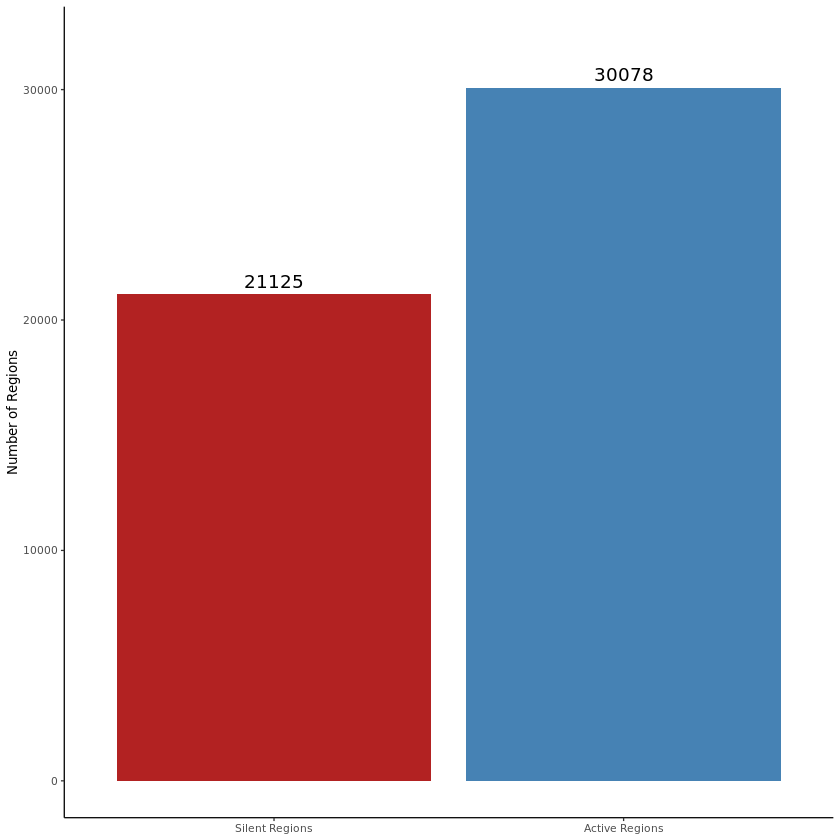

In [10]:
df <- data.frame(Group = c("Silent Regions", "Active Regions"),
  value = c(21125, 30078))

df$Group <- factor(df$Group, levels = c("Silent Regions", "Active Regions"))

p <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_classic(base_size = 8) + 
  ylab("Number of Regions") +
  scale_fill_manual(values = c("firebrick", "steelblue")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 32000))
p
res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/region_number_bar.pdf"), device = cairo_pdf, width = 3, height = 3)

### Regulatory region size distribution

In [1]:
library(tidyverse)

active <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/active_regions.bed", 
                   col_names = c("Chr", "Start", "End", "name", "score", "strand")) %>% mutate(size = End-Start, Type = "active")

silent <- read_tsv("/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink/silent_regions.bed", 
                   col_names = c("Chr", "Start", "End", "name", "score", "strand")) %>% mutate(size = End-Start, Type = "silent")

all <- bind_rows(silent, active)
all$Type <- factor(all$Type, levels=c("silent", "active"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Rows: 30078 Columns: 6

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Chr, name, strand
dbl (3): Start, End, score


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 21125 Columns: 6

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Chr, name, strand
dbl (3): Start, End, score


ℹ Use `spec()` to retrieve the full column specification f

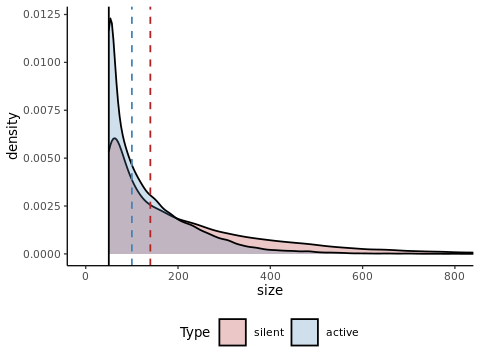

In [18]:
p <- ggplot(all, aes(x=size, fill=Type)) +
  geom_density(alpha=.25) +
  geom_vline(xintercept = c(50, 100, 140), linetype = c("solid", "dashed", "dashed"), color = c("black", "steelblue", "firebrick")) +
  theme_classic(base_size = 8) + 
  scale_fill_manual(values = c("firebrick", "steelblue")) +
  theme(legend.position = "bottom", plot.title = element_text(face="bold")) + 
  coord_cartesian(xlim=c(0,800))

options(repr.plot.width = 4, repr.plot.height = 3)
p

In [20]:
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/regulatory-regions_size_distribution.pdf"), device = cairo_pdf, height = 3, width = 4)

## Compare to fragment group method

We compared to the fragment method used in HiDRA using our interpretation of their methods. A figure depicting this strategy is in the manuscript (supp fig 4A).

We did not use the python script, but we did use the same R script to do differential analysis. 

In [ ]:
%%bash
#Function: create_FGs [INPUT_FILE] [OUTPUT_FILE]
create_FGs () {
    #variables
    INPUT_FILE=$1 
    OUTPUT_FILE=$2
    
    ### OPERATION ###
    # This operation is one very long pipe. The comments below explain each step of the process. . 
    # 1. Convert mapped read pairs (input file) to bedpe file format.
    # 2. Use awk to print the coordinates of the sequenced fragment.
    # 3. Sort by chr location and remove duplicates with sort -u.
    # 4. Create synthetic fragment groups from the bed-formated sequence fragments that overlap by 75%. Use the fraction-both setting, which requires both sequence fragments to overlap each other by 75% rather than only one. 
    # 5. Remove fragment groups that are created using less than 10 sequence fragments (awk filters by member, the cut removes the first column, which reports the number of members per fragment group, uniq just ensures all regions are unique and there are no duplicates).
    # 6. Convert to a gff file format and write to output file.
    bedtools bamtobed -i $INPUT_FILE -bedpe | awk 'BEGIN{FS=OFS="\t"} {print $1,$2,$6,$9,$7}' - \
        | sort -k1,1 -k2,2n -k3,3n -u - | bedmap --count --echo-map-range --fraction-both 0.75 --delim '\t' - \
        | awk '$1>=10' - | cut -f2- - | sort -k1,1 -k2,2n -k3,3n - | uniq - \
        | awk 'BEGIN {OFS=FS="\t"}{print $1,"curated","accessible_region",$2,$3,".",".",".","Peak_ID=Peak_"NR}' - \
        > $OUTPUT_FILE
}
#################
#Variables
INPUT='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged.filtered.n-sorted.bam'
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups' 

mkdir $OUTPUT_DIR

#GMinGM
create_FGs $INPUT ${OUTPUT_DIR}/GM12878_fragment-groups.gff

In [1]:
%%bash
#Define path variables.
BAMS='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates'
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups'
GENOME_FA='/data/hodges_lab/hg38_genome/hg38.fa'

featureCounts -p -B -O --minOverlap 1 -T 8 -F GTF -t accessible_region -g Peak_ID -G $GENOME_FA \
    -a ${OUTPUT_DIR}/GM12878_fragment-groups.gff  \
    -o ${OUTPUT_DIR}/GM12878_FG-method_counts.tsv \
    ${BAMS}/GM12878inGM12878_DNA_Rep1.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep2.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep3.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep1.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep2.filtered.pos-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep3.filtered.pos-sorted.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o GM12878inGM12878_DNA_Rep1.filtered.pos-sor ... ||
||                           o GM12878inGM12878_DNA_Rep2.filtered.pos-sor ... ||
||                           o GM12878inGM12878_DNA_Rep3.filtered.pos-sor ... ||
||                           o GM12878inGM12878_RNA_Rep1.filtered

In [1]:
%%bash

OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups'

#Call R script to perform diff analysis
Rscript RNA-to-DNA_differential-analysis.r --counts ${OUTPUT_DIR}/GM12878_FG-method_counts.tsv \
    --num_reps 3 --cores 8 --FDR 0.1 --out_dir ${OUTPUT_DIR}/FG_DESeq-output

mkdir: cannot create directory ‘/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups/FG_DESeq-output’: File exists

── Column specification ────────────────────────────────────────────────────────
cols(
  Bin_ID = col_character(),
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  Strand = col_character(),
  Length = col_double(),
  DNA1 = col_double(),
  DNA2 = col_double(),
  DNA3 = col_double(),
  RNA1 = col_double(),
  RNA2 = col_double(),
  RNA3 = col_double()
)

converting counts to integer mode
Warning message:
In DESeqDataSet(se, design = design, ignoreRank) :
  some variables in design formula are characters, converting to factors
estimating size factors
estimating dispersions
gene-wise dispersion estimates: 8 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 8 workers


In [ ]:
%%bash

#merge overlapping bins

OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups'

#active
bedtools merge -c 5 -o mean -i ${OUTPUT_DIR}/FG_DESeq-output/active_bins.bed | \
    sort -k1,1 -k2,2n - > ${OUTPUT_DIR}/FG_DESeq-output/active_regions.bed 
    
#silent
bedtools merge -c 5 -o mean -i ${OUTPUT_DIR}/FG_DESeq-output/silent_bins.bed | \
    sort -k1,1 -k2,2n - > ${OUTPUT_DIR}/FG_DESeq-output/silent_regions.bed 

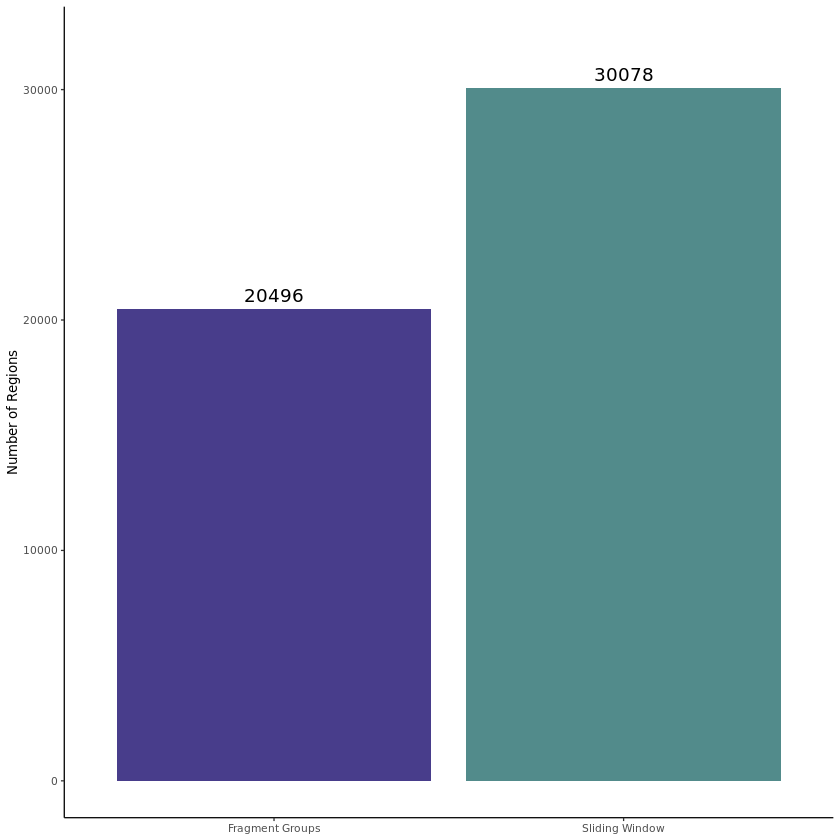

In [7]:
library(ggplot2)

df <- data.frame(Group = c("Fragment Groups", "Sliding Window"),
  value = c(20496, 30078))

df$Group <- factor(df$Group, levels = c("Fragment Groups", "Sliding Window"))

p <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_classic(base_size = 8) + 
  ylab("Number of Regions") +
  scale_fill_manual(values = c("darkslateblue", "darkslategray4")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 32000))
p

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/FG_bar.pdf"), device = cairo_pdf, width = 3, height = 3)

In [ ]:
%%bash
#How does this compare?
AS="/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/regulatory_regions/GM12878inGM12878_0.1_3-reps_no-counts_no-shrink"
OUTPUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/bins_vs_fragment-groups'

wc -l ${AS}/active_regions.bed
wc -l ${OUTPUT_DIR}/FG_DESeq-output/active_regions.bed 

bedtools jaccard -a ${OUTPUT_DIR}/FG_DESeq-output/active_regions.bed -b ${AS}/active_regions.bed

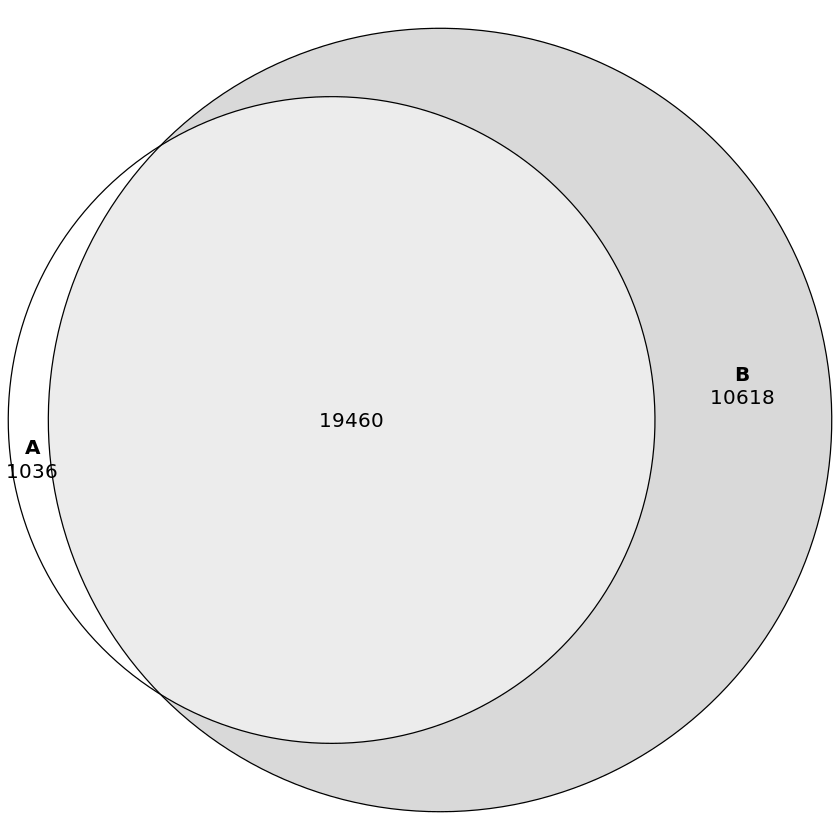

In [2]:
#make euler plot with values above. 
library(tidyverse)
library(eulerr)

#set names to variables
A_name <- "`FG`"
B_name <- "`SW`"

#set values to variables:
A <- 20496
B <- 30078
A_B <- 19460

#make named list using variables above. This shouldn't change for all 3-way comparisons. 
combo <- c(A = A-A_B, B = B-A_B, 
           `A&B` = A_B)

eul <- plot(euler(combo), quantities = TRUE) 
eul

#save and edit in illustrator. 
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(plot = eul, paste0(dir,"/euler-plot_FGs-vs-SW.pdf"), width = 3, height = 3)

## Compare without duplicates

I performed the same analysis as above (section 3) but using de-duplicated files instead to determine the effects of removing duplicates. See manuscript for rationale. 

We also made correlation plots using the same strategy. 

In [3]:
%%bash
PEAKS='GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'
BAMS=''
OUT_DIR=''

python3 call_ATAC-STARR_regulatory-regions.py -i $PEAKS -o $OUT_DIR -q 0.1 \
    -d ${BAMS}/GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_DNA_Rep3.unique.n-sorted.bam \
    -r ${BAMS}/GM12878inGM12878_RNA_Rep1.unique.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep2.unique.n-sorted.bam \
    ${BAMS}/GM12878inGM12878_RNA_Rep3.unique.n-sorted.bam

PARAMETERS:
ChrAcc Peaks File: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
DNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_DNA_Rep3.unique.n-sorted.bam
RNA Files: /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep1.unique.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep2.unique.n-sorted.bam /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/individual_replicates/GM12878inGM12878_RNA_Rep3.unique.n-sorted.bam
Output Directory: /data/hodges_lab/ATAC-STARR_B-cells/results/wit


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o GM12878inGM12878_DNA_Rep1.unique.n-sorted.bam  ||
||                           o GM12878inGM12878_DNA_Rep2.unique.n-sorted.bam  ||
||                           o GM12878inGM12878_DNA_Rep3.unique.n-sorted.bam  ||
||                           o GM12878inGM12878_RNA_Rep1.unique.n

In [ ]:
%%bash
wc -l /data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/active_regions.bed
wc -l /data/hodges_lab/ATAC-STARR_B-cells/results/without_duplicates/silent_regions.bed

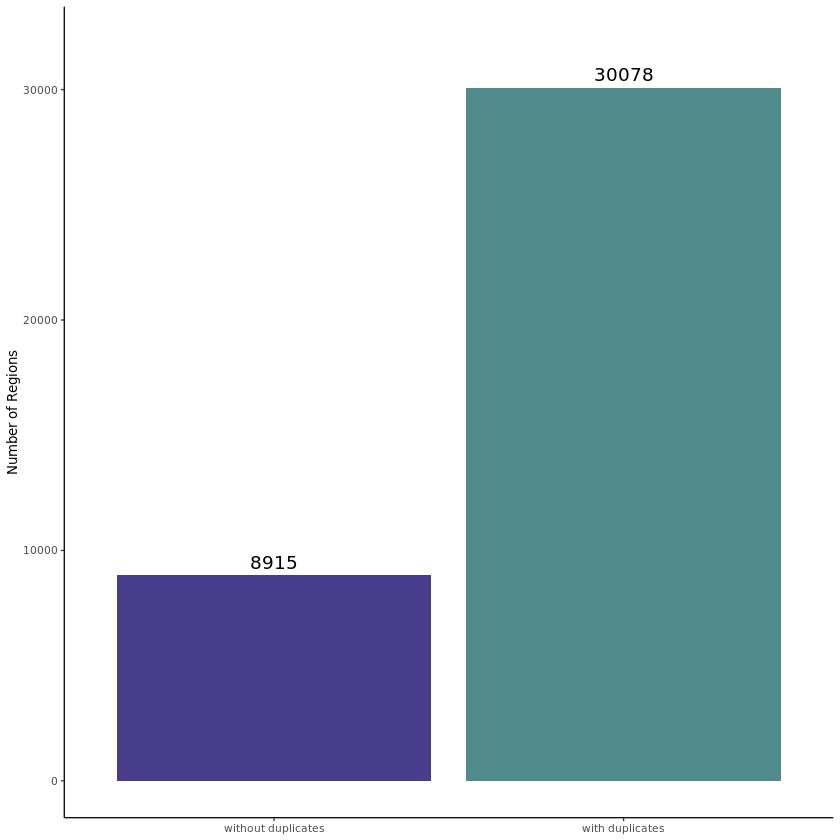

In [1]:
library(ggplot2)

df <- data.frame(Group = c("without duplicates", "with duplicates"),
  value = c(8915, 30078))

df$Group <- factor(df$Group, levels = c("without duplicates", "with duplicates"))

p <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_classic(base_size = 8) + 
  ylab("Number of Regions") +
  scale_fill_manual(values = c("darkslateblue", "darkslategray4")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 32000))
p

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res_dir, "/without_dups_bar.pdf"), device = cairo_pdf, width = 3, height = 3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



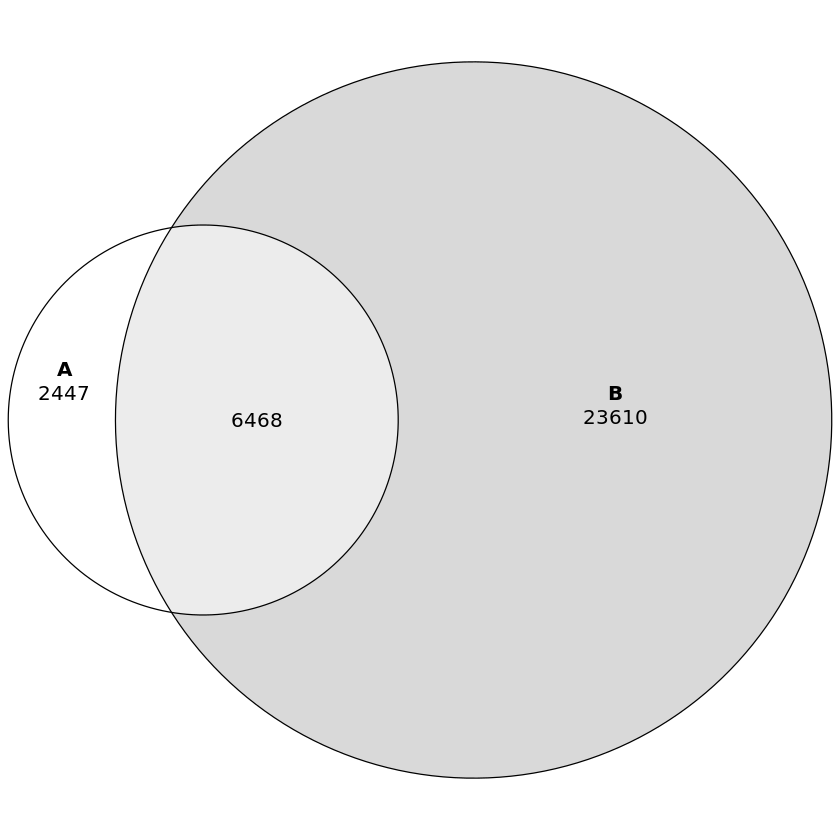

In [1]:
#make euler plot with values above. 
library(tidyverse)
library(eulerr)

#set names to variables
A_name <- "`FG`"
B_name <- "`SW`"

#set values to variables:
A <- 8915
B <- 30078
A_B <- 6468

#make named list using variables above. This shouldn't change for all 3-way comparisons. 
combo <- c(A = A-A_B, B = B-A_B, 
           `A&B` = A_B)

eul <- plot(euler(combo), quantities = TRUE) 
eul

#save and edit in illustrator. 
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(plot = eul, paste0(dir,"/euler-plot_dups.pdf"), width = 3, height = 3)